# Установка библиотеки и инициализация модели

In [ ]:
!pip install blocksnet ipykernel mapclassify -qq

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
import geopandas as gpd
import pandas as pd

import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_path = '/data'

In [ ]:
from blocksnet import City
Kemerovo = City.from_pickle(os.path.join(data_path, 'city_model.pickle'))

In [ ]:
print(Kemerovo)

CRS : EPSG:32645
Blocks : 2584
Service types : 0/66
Buildings : 0
Services : 0



# Подготовка данных по зданиям

In [ ]:
buildings = gpd.read_file(os.path.join(data_path, 'building.geojson'))
buildings.head()

,fid,BUILDING,OSM_TYPE,OSM_ID,is_living,A_PLACE,osm_way_id,amenity,leisure,shop,...,AREA_LIVE_,AREA_NLIVE,AREA_GEN_2,AREA_LAND_,FUNDAMENT_,name,layer,path,population,geometry
0,15952,yes,way,98235260,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,2.0,"MULTIPOLYGON (((86.06308 55.40475, 86.06323 55..."
1,15953,yes,way,98235332,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((86.06291 55.40494, 86.06311 55..."
2,15954,yes,way,244517159,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((86.06289 55.40514, 86.06309 55..."
3,15955,yes,way,244517161,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((86.06313 55.40441, 86.06333 55..."
4,21341,None,None,None,1,None,None,None,None,None,...,213.0,NaN,NaN,2315.0,None,Рудничный района,name_Рудничный района,C:/Users/krugl/Downloads/name_Рудничный района...,5.0,"MULTIPOLYGON (((86.07741 55.37759, 86.07771 55..."


In [ ]:
local_crs = buildings.estimate_utm_crs() # определяем локальную систему координат
local_crs

<Projected CRS: EPSG:32645>
Name: WGS 84 / UTM zone 45N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°E and 90°E, northern hemisphere between equator and 84°N, onshore and offshore. Bangladesh. Bhutan. China. India. Kazakhstan. Mongolia. Nepal. Russian Federation.
- bounds: (84.0, 0.0, 90.0, 84.0)
Coordinate Operation:
- name: UTM zone 45N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings.to_crs(local_crs) # переводим здания в локальную систему координат
buildings.crs

<Projected CRS: EPSG:32645>
Name: WGS 84 / UTM zone 45N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°E and 90°E, northern hemisphere between equator and 84°N, onshore and offshore. Bangladesh. Bhutan. China. India. Kazakhstan. Mongolia. Nepal. Russian Federation.
- bounds: (84.0, 0.0, 90.0, 84.0)
Coordinate Operation:
- name: UTM zone 45N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Работа со зданиями

In [ ]:
buildings = buildings[buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]
buildings.head()

,fid,BUILDING,OSM_TYPE,OSM_ID,is_living,A_PLACE,osm_way_id,amenity,leisure,shop,...,AREA_LIVE_,AREA_NLIVE,AREA_GEN_2,AREA_LAND_,FUNDAMENT_,name,layer,path,population,geometry
0,15952,yes,way,98235260,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,2.0,"MULTIPOLYGON (((440672.492 6140232.541, 440681..."
1,15953,yes,way,98235332,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((440662.179 6140253.972, 440674..."
2,15954,yes,way,244517159,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((440661.026 6140276.504, 440673..."
3,15955,yes,way,244517161,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((440674.966 6140194.743, 440687..."
4,21341,None,None,None,1,None,None,None,None,None,...,213.0,NaN,NaN,2315.0,None,Рудничный района,name_Рудничный района,C:/Users/krugl/Downloads/name_Рудничный района...,5.0,"MULTIPOLYGON (((441539.977 6137198.116, 441559..."


In [ ]:
# Сброс индекса, чтобы превратить индексы в обычные столбцы
buildings = buildings.reset_index(drop=True)
# Проверяем результат
buildings.head()

,fid,BUILDING,OSM_TYPE,OSM_ID,is_living,A_PLACE,osm_way_id,amenity,leisure,shop,...,AREA_LIVE_,AREA_NLIVE,AREA_GEN_2,AREA_LAND_,FUNDAMENT_,name,layer,path,population,geometry
0,15952,yes,way,98235260,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,2.0,"MULTIPOLYGON (((440672.492 6140232.541, 440681..."
1,15953,yes,way,98235332,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((440662.179 6140253.972, 440674..."
2,15954,yes,way,244517159,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((440661.026 6140276.504, 440673..."
3,15955,yes,way,244517161,1,None,None,None,None,None,...,NaN,NaN,NaN,NaN,None,Кировский район,name_Кировский район (1) — name_Кировский район,C:/Users/krugl/Downloads/name_Кировский район ...,3.0,"MULTIPOLYGON (((440674.966 6140194.743, 440687..."
4,21341,None,None,None,1,None,None,None,None,None,...,213.0,NaN,NaN,2315.0,None,Рудничный района,name_Рудничный района,C:/Users/krugl/Downloads/name_Рудничный района...,5.0,"MULTIPOLYGON (((441539.977 6137198.116, 441559..."


In [ ]:
# Преобразуем столбец 'building:levels' в числовой тип, ошибки будут заменены на NaN
buildings['building:levels'] = pd.to_numeric(buildings['building:levels'], errors='coerce')
buildings['building:levels'] = buildings['building:levels'].round()

# Заполним пропущенные значения (NaN) нулями или другими подходящими значениями
buildings = buildings.fillna(0)

# Добавляем или преобразуем необходимые атрибуты

# 1. Количество этажей (number_of_floors)
buildings['number_of_floors'] = buildings.apply(
    lambda x: x['building:levels'] if x['building:levels'] > 1 else 1,
    axis=1
)

# 2. Площадь застройки (footprint_area) - как площадь геометрии (основание здания)
buildings['footprint_area'] = buildings.geometry.area

# 3. Общая площадь всех этажей (build_floor_area) - footprint_area * number_of_floors
buildings['build_floor_area'] = buildings['footprint_area'] * buildings['number_of_floors']

# 4. Жилая площадь (living_area) и нежилая площадь (non_living_area)
# Жилая площадь будет рассчитываться только для жилых зданий
buildings['living_area'] = buildings.apply(
    lambda x: 0.8 * x['build_floor_area'] if x['is_living'] == 1 else 0,
    axis=1
)

# Нежилая площадь будет 20% от общей площади этажей
buildings['non_living_area'] = buildings['build_floor_area'] - buildings['living_area']

# 5. Население (population) - для жилых зданий
buildings['population'] = buildings.apply(
    lambda x: round(x['living_area'] / 20) if x['is_living'] == 1 else 0,
    axis=1
)

# Теперь удалим все остальные столбцы, кроме 'geometry', 'build_floor_area', 'living_area', 'non_living_area',
# 'footprint_area', 'number_of_floors', 'population'
buildings = buildings[['geometry', 'build_floor_area', 'living_area', 'non_living_area',
                       'footprint_area', 'number_of_floors', 'population']]

# Проверим результат
buildings

,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
0,"MULTIPOLYGON (((440672.492 6140232.541, 440681...",71.360893,57.088714,14.272179,71.360893,1.0,3
1,"MULTIPOLYGON (((440662.179 6140253.972, 440674...",151.924872,121.539897,30.384974,151.924872,1.0,6
2,"MULTIPOLYGON (((440661.026 6140276.504, 440673...",151.924101,121.539281,30.384820,151.924101,1.0,6
3,"MULTIPOLYGON (((440674.966 6140194.743, 440687...",151.926888,121.541510,30.385378,151.926888,1.0,6
4,"MULTIPOLYGON (((441539.977 6137198.116, 441559...",238.755161,191.004129,47.751032,238.755161,1.0,10
...,...,...,...,...,...,...,...
44966,"MULTIPOLYGON (((431389.708 6130935.821, 431389...",39.049546,31.239637,7.809909,39.049546,1.0,2
44967,"MULTIPOLYGON (((431370.867 6130885.896, 431370...",39.050433,31.240347,7.810087,39.050433,1.0,2
44968,"MULTIPOLYGON (((431135.583 6130732.245, 431134...",39.053237,31.242589,7.810647,39.053237,1.0,2
44969,"MULTIPOLYGON (((431100.139 6130709.042, 431099...",39.053660,31.242928,7.810732,39.053660,1.0,2


## Загрузка зданий в модель

In [ ]:
Kemerovo.update_buildings(buildings) # загрузка зданий в модель

2024-12-23 06:44:20.597 | INFO     | blocksnet.models.city:update_buildings:1237 - Removing existing blocks from the model
2024-12-23 06:44:20.611 | INFO     | blocksnet.models.city:update_buildings:1241 - Joining buildings and blocks
2024-12-23 06:44:31.426 | WARNING  | blocksnet.models.city:update_buildings:1253 - 225 buildings did not intersect any block
Update blocks buildings: 100%|██████████| 2156/2156 [00:09<00:00, 237.29it/s]


,geometry,build_floor_area,living_area,non_living_area,footprint_area,number_of_floors,population
563,"MULTIPOLYGON (((444098.607 6140555.696, 444102...",296.365319,237.092255,59.273064,296.365319,1.0,12
10125,"MULTIPOLYGON (((447431.618 6138326.613, 447431...",36.277743,0.000000,36.277743,36.277743,1.0,0
10268,"MULTIPOLYGON (((449220.616 6143872.697, 449222...",7.823751,0.000000,7.823751,7.823751,1.0,0
10278,"MULTIPOLYGON (((449358.795 6143508.463, 449360...",11.645500,0.000000,11.645500,11.645500,1.0,0
10456,"MULTIPOLYGON (((448564.770 6145900.521, 448561...",14.678806,0.000000,14.678806,14.678806,1.0,0
...,...,...,...,...,...,...,...
36668,"MULTIPOLYGON (((444427.000 6131020.274, 444452...",423.622134,0.000000,423.622134,423.622134,1.0,0
40797,"MULTIPOLYGON (((437417.893 6131968.496, 437409...",101.853218,0.000000,101.853218,101.853218,1.0,0
43070,"MULTIPOLYGON (((442089.981 6128262.805, 442089...",39.092662,31.274130,7.818532,39.092662,1.0,2
44842,"MULTIPOLYGON (((434359.782 6126465.875, 434359...",39.127160,31.301728,7.825432,39.127160,1.0,2


In [ ]:
Kemerovo.get_buildings_gdf() # проверим результат

,block_id,geometry,population,footprint_area,build_floor_area,living_area,non_living_area,number_of_floors,is_living
id,,,,,,,,,
459,0,"POLYGON ((450676.146 6141664.834, 450676.077 6...",77,384.881365,1924.406824,1539.525459,384.881365,5,True
457,0,"POLYGON ((450798.690 6141638.889, 450799.397 6...",222,692.681586,5541.452686,4433.162149,1108.290537,8,True
458,0,"POLYGON ((450736.849 6141626.213, 450737.494 6...",247,771.682288,6173.458304,4938.766643,1234.691661,8,True
463,0,"POLYGON ((450599.915 6141560.657, 450600.549 6...",180,899.512582,4497.562909,3598.050327,899.512582,5,True
462,0,"POLYGON ((450658.620 6141544.785, 450660.424 6...",180,899.657106,4498.285531,3598.628425,899.657106,5,True
...,...,...,...,...,...,...,...,...,...
25941,2583,"POLYGON ((442109.812 6132597.448, 442123.186 6...",6,146.369992,146.369992,117.095994,29.273998,1,True
29727,2583,"POLYGON ((442048.547 6132595.892, 442061.921 6...",0,146.370095,146.370095,0.000000,146.370095,1,False
29726,2583,"POLYGON ((442028.208 6132595.925, 442041.582 6...",0,146.370111,146.370111,0.000000,146.370111,1,False


# Подготовка данных по сервисам

## Загрузка сервисов

In [ ]:
import osmnx as ox
import geopandas as gpd

In [ ]:
service_list = ['school', 'kindergarten','hospital', 'polyclinic', 'police', 'bus_stop', 'mall', 'pitch', 'swimming_pool', 'stadium', 'cinema', 'convenience', 'supermarket', 'playground', 'pharmacy', 'bank', 'cafe', 'restaurant', 'hairdresser', 'park', 'hotel', 'post', 'dog_park', 'bakery']

In [ ]:
services_dataframes = []


for service_name in service_list:

    # Формируем путь к файлу GeoJSON
    file_path = f'/content/drive/MyDrive/Анализ данных/Кемерово/Сервисы/{service_name}.geojson'

    # Читаем файл GeoJSON
    service_gdf = gpd.read_file(file_path)

    # Сбрасываем индекс
    service_gdf = service_gdf.reset_index(drop=True)

    # Преобразуем в нужную систему координат
    service_gdf = service_gdf.to_crs(local_crs)

    # Добавляем новый столбец с типом сервиса
    service_gdf['service_type'] = service_name

    # Добавляем GeoDataFrame в список
    services_dataframes.append(service_gdf)


# Объединяем все GeoDataFrame в один
merged_services_gdf = gpd.GeoDataFrame(pd.concat(services_dataframes, ignore_index=True))


## Работа с сервисами

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# Функция для удаления внутренних полигонов
def remove_inner_polygons(gdf_polygons):
    to_remove = []
    for idx, poly1 in gdf_polygons.iterrows():
        for idx2, poly2 in gdf_polygons.iterrows():
            if (
                idx != idx2
                and poly1.geometry is not None
                and poly2.geometry is not None
                and poly1.geometry.contains(poly2.geometry)
            ):
                to_remove.append(idx2)
    return gdf_polygons.drop(index=to_remove)

# Функция для преобразования полигонов в центроиды
def convert_to_centroids(gdf_polygons):
    gdf_polygons['geometry'] = gdf_polygons.geometry.centroid
    return gdf_polygons

# Функция для удаления близко расположенных центроидов
def remove_close_centroids(gdf_centroids, buffer_distance=60):
    final_centroids = gpd.GeoDataFrame(columns=gdf_centroids.columns, crs=gdf_centroids.crs)

    while not gdf_centroids.empty:
        current_point = gdf_centroids.iloc[0]

        if current_point.geometry is not None:
            buffer = current_point.geometry.buffer(buffer_distance)
            close_points = gdf_centroids[gdf_centroids.geometry.within(buffer)]
            final_centroids = pd.concat(
                [final_centroids, gpd.GeoDataFrame([current_point], crs=gdf_centroids.crs)],
                ignore_index=True
            )
            gdf_centroids = gdf_centroids.drop(index=close_points.index)
        else:
            gdf_centroids = gdf_centroids.drop(index=current_point.name)

    return final_centroids

# Функция для обработки GeoDataFrame по каждому service_type
def process_geodataframe_by_service_type(gdf, buffer_distance=60):
    # Создаем пустой список для обработки
    processed_gdfs = []

    # Получаем уникальные значения service_type
    unique_service_types = gdf['service_type'].unique()

    # Обрабатываем данные для каждого типа сервиса
    for service_type in unique_service_types:
        service_gdf = gdf[gdf['service_type'] == service_type]

        if service_gdf.empty:
            print(f"Warning: No data for service type '{service_type}'.")
            continue

        # Применяем функции обработки
        service_gdf = remove_inner_polygons(service_gdf)
        service_gdf = convert_to_centroids(service_gdf)
        service_gdf = remove_close_centroids(service_gdf, buffer_distance=buffer_distance)

        # Добавляем обработанный GeoDataFrame в список
        processed_gdfs.append(service_gdf)

    # Объединяем все обработанные данные в один GeoDataFrame
    if processed_gdfs:
        final_gdf = gpd.GeoDataFrame(pd.concat(processed_gdfs, ignore_index=True), crs=gdf.crs)
    else:
        final_gdf = gpd.GeoDataFrame(columns=gdf.columns, crs=gdf.crs)

    return final_gdf

# Применяем функцию ко всему объединенному GeoDataFrame
final_processed_gdf = process_geodataframe_by_service_type(merged_services_gdf)


## Загрузка сервисов в модель

In [ ]:
# Перебираем уникальные типы сервисов
for service_type in final_processed_gdf['service_type'].unique():
    # Фильтруем данные по текущему типу сервиса
      service_data = final_processed_gdf[final_processed_gdf['service_type'] == service_type]

      # Печатаем информацию для отладки
      print(f"Загрузка данных для сервиса: {service_type}")

      # Загружаем данные в модель, подставляя service_type
      Kemerovo.update_services(service_type, service_data[['geometry']])

Загрузка данных для сервиса: school
Загрузка данных для сервиса: kindergarten
Загрузка данных для сервиса: hospital
Загрузка данных для сервиса: polyclinic
Загрузка данных для сервиса: police
Загрузка данных для сервиса: bus_stop
Загрузка данных для сервиса: mall
Загрузка данных для сервиса: pitch
Загрузка данных для сервиса: swimming_pool
Загрузка данных для сервиса: stadium
Загрузка данных для сервиса: cinema
Загрузка данных для сервиса: convenience
Загрузка данных для сервиса: supermarket
Загрузка данных для сервиса: playground
Загрузка данных для сервиса: pharmacy
Загрузка данных для сервиса: bank
Загрузка данных для сервиса: cafe
Загрузка данных для сервиса: restaurant
Загрузка данных для сервиса: hairdresser
Загрузка данных для сервиса: park
Загрузка данных для сервиса: hotel
Загрузка данных для сервиса: post
Загрузка данных для сервиса: dog_park
Загрузка данных для сервиса: bakery


# Работа с моделью

## Определение типа землепользования

In [ ]:
from blocksnet import LandUsePrediction # импортируем модуль

lup = LandUsePrediction(city_model=Kemerovo)
lu_blocks = lup.calculate()
lu_blocks.head()

100%|██████████| 2584/2584 [00:15<00:00, 168.46it/s]


,geometry,land_use
id,,
0,"POLYGON ((450622.033 6141543.078, 450547.970 6...",RESIDENTIAL
1,"POLYGON ((450798.085 6142405.148, 450695.255 6...",RESIDENTIAL
2,"POLYGON ((450813.905 6142405.532, 450957.343 6...",None
3,"POLYGON ((450855.802 6140721.411, 451101.394 6...",None
4,"POLYGON ((451328.364 6140950.546, 451328.364 6...",None


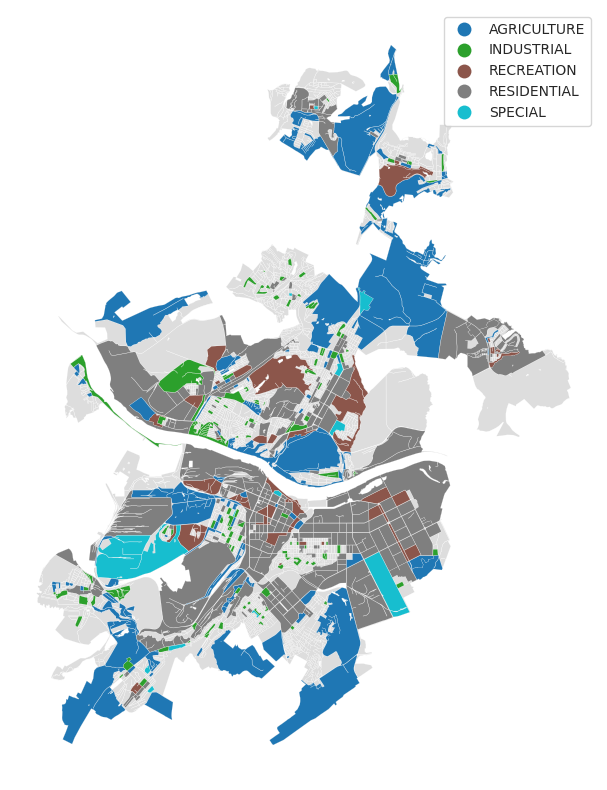

In [ ]:
lup.plot(lu_blocks)

In [ ]:
lu_blocks.explore()

Вручную корректируем землепользование в полигонах, расположенных поблизости от террритории проектирования, чтобы точнее понимать контекст

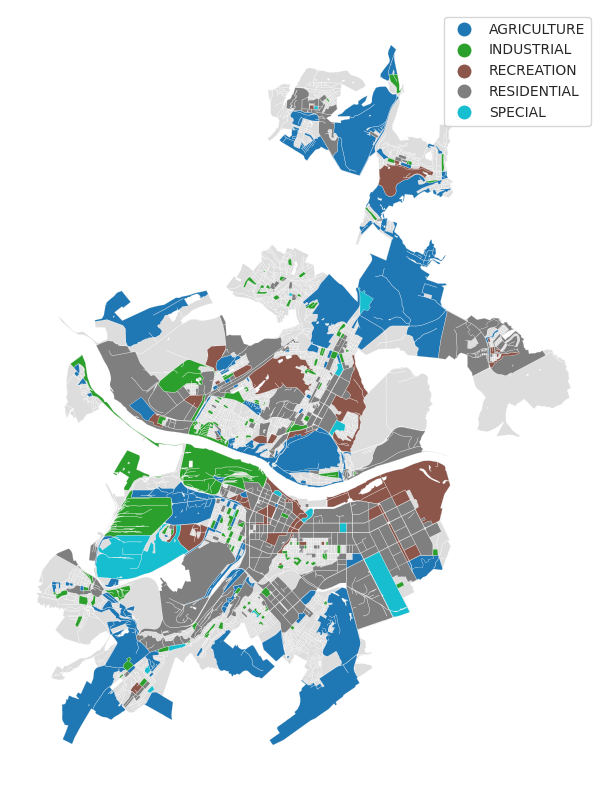

In [ ]:
lu_blocks.loc[lu_blocks.index.isin([648, 882, 866, 961, 984, 1019, 2273, 2571]), 'land_use'] = 'RECREATION'
lu_blocks.loc[lu_blocks.index.isin([1167, 1177, 1219, 1669]), 'land_use'] = 'INDUSTRIAL'
lu_blocks.loc[lu_blocks.index.isin([666, 881]), 'land_use'] = 'SPECIAL'
lu_blocks.loc[lu_blocks.index.isin([648, 995]), 'land_use'] = 'RESIDENTIAL'
lup.plot(lu_blocks)

In [ ]:
Kemerovo.update_land_use(lu_blocks)

## Обеспеченность

Обновляем список сервисов, оставляя только те, которые интересны для анализа

In [ ]:
service_list = ['school', 'kindergarten','hospital', 'polyclinic', 'police', 'pitch', 'swimming_pool', 'cinema', 'playground', 'pharmacy', 'bank', 'cafe', 'restaurant', 'hairdresser', 'park', 'post', 'dog_park', 'bakery']

In [ ]:
import matplotlib.pyplot as plt
from blocksnet import Provision, ProvisionMethod
for service in service_list:
  prov = Provision(city_model=Kemerovo)
  prov_res = prov.calculate(service)

  prov.plot(prov_res)

  #prov_res.to_file(f'{service}_provision_gravity.geojson')

  plt.text(0.5, 1.05, f"Service: {service}", horizontalalignment='center',
           verticalalignment='top', transform=plt.gca().transAxes, fontsize=12, color='black')

  plt.show()

## Сохранение модели

In [ ]:
Kemerovo.to_pickle('kemerovo_model.pickle')

In [ ]:
Kemerovo = City.from_pickle('kemerovo_model.pickle') # считываем в переменную готовую модель
print(Kemerovo)

CRS : EPSG:32645
Blocks : 2584
Service types : 24/66
Buildings : 44746
Services : 3022



##Гипотеза №1

Находим координаты центроида территории проектирования, чтобы загружать туда сервисы

In [ ]:
block = Kemerovo[2569]
centr = block.geometry.centroid
print(centr)

POINT (443619.0029670454 6134831.552432941)


In [ ]:
from shapely.geometry import Point

In [ ]:
# Вводим одну геометрию в центре полигона для всех сервисов
common_geometry = Point(443619.0029670454, 6134831.552432941)

# Списки добавляемых сервисов
servicelists = {
    "services1": ['kindergarten', 'police', 'school'],
    "services2": ['school'],
    "services3": ['police']
}

combined_gdfs = {}

for servicelist, service_types in servicelists.items():
    data = {
        "service_type": service_types,
        "geometry": [common_geometry] * len(service_types)
    }
    hypothesis_gdf = gpd.GeoDataFrame(data, crs=local_crs)
    #Объединяем новые гдф со старым, чтобы не потерять загруженные сервисы при апдейте модели
    combined_gdfs[servicelist] = pd.concat([hypothesis_gdf, final_processed_gdf], ignore_index=True)


Добавляем на нашу территорию население по гипотезе

In [ ]:
update = {
  2569: {
    'population': 8391
  }
}

update_df = pd.DataFrame.from_dict(update, 'index')

Обновляем землепользование и добавляем сервисы в новую модель на основе старой

In [ ]:
Kemerovo1 = City.from_pickle('kemerovo_model.pickle')
Kemerovo2 = City.from_pickle('kemerovo_model.pickle')
Kemerovo3 = City.from_pickle('kemerovo_model.pickle')
Kemerovo_list = [Kemerovo1, Kemerovo2, Kemerovo3]

In [ ]:
for Kemerovo, (servicelist, hypothesis_gdf) in zip(Kemerovo_list, combined_gdfs.items()):
    for service in hypothesis_gdf['service_type'].unique():
        service_data = hypothesis_gdf[hypothesis_gdf['service_type'] == service]
        Kemerovo.update_services(service, service_data[['geometry']])

Прописываем население для каждой гипотезы

In [ ]:
populations = [8391, 0, 0]

Гипотеза  1


2024-12-23 10:09:02.867 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 1994x64
2024-12-23 10:09:17.149 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 10:09:21.317 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 10:09:23.442 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


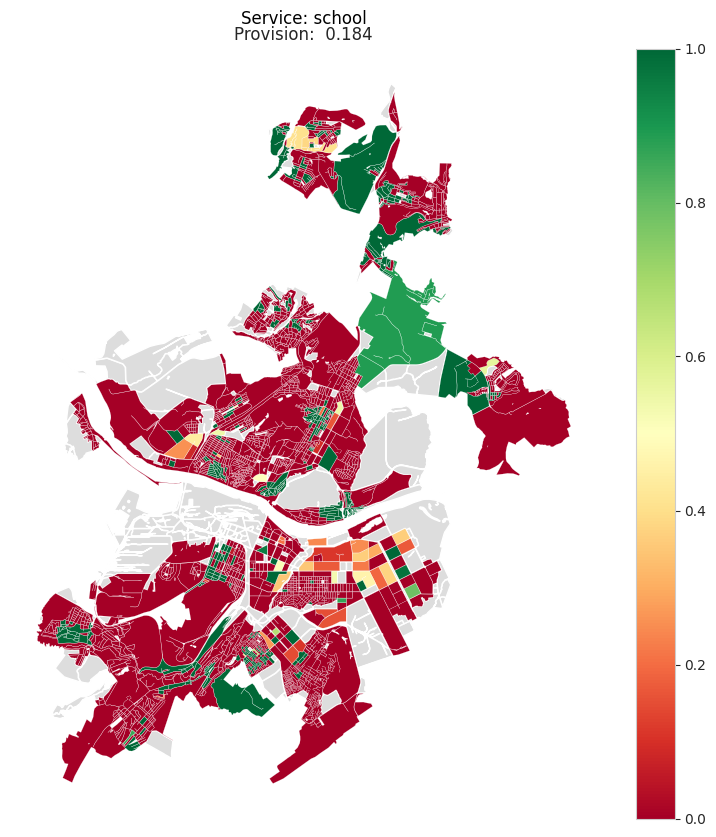

2024-12-23 10:09:25.675 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 7 : 1994x114
2024-12-23 10:09:34.103 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 10:09:36.536 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 10:09:38.103 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


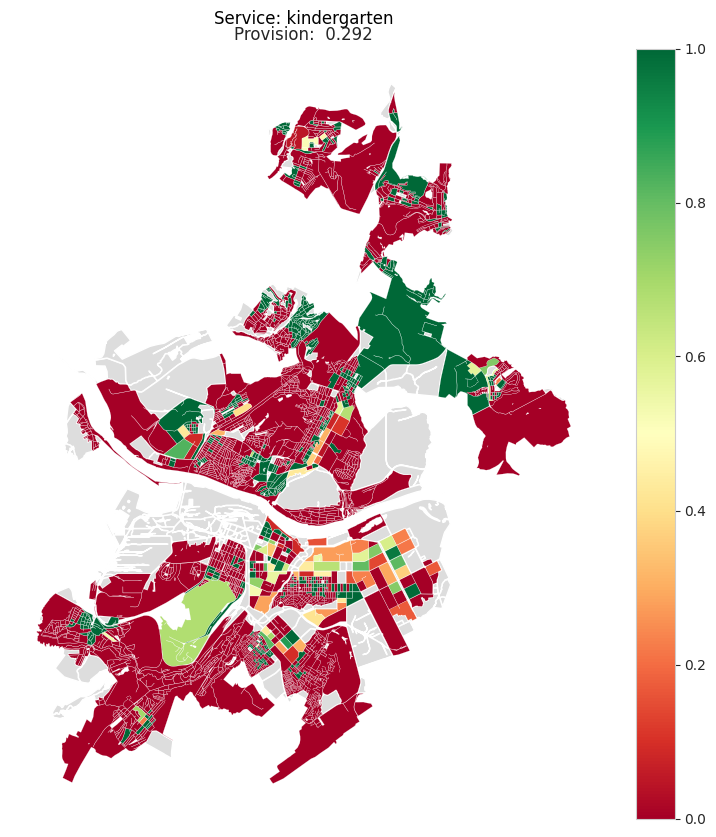

2024-12-23 10:09:40.288 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 1994x13
2024-12-23 10:09:41.271 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 10:09:41.736 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 10:09:42.193 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


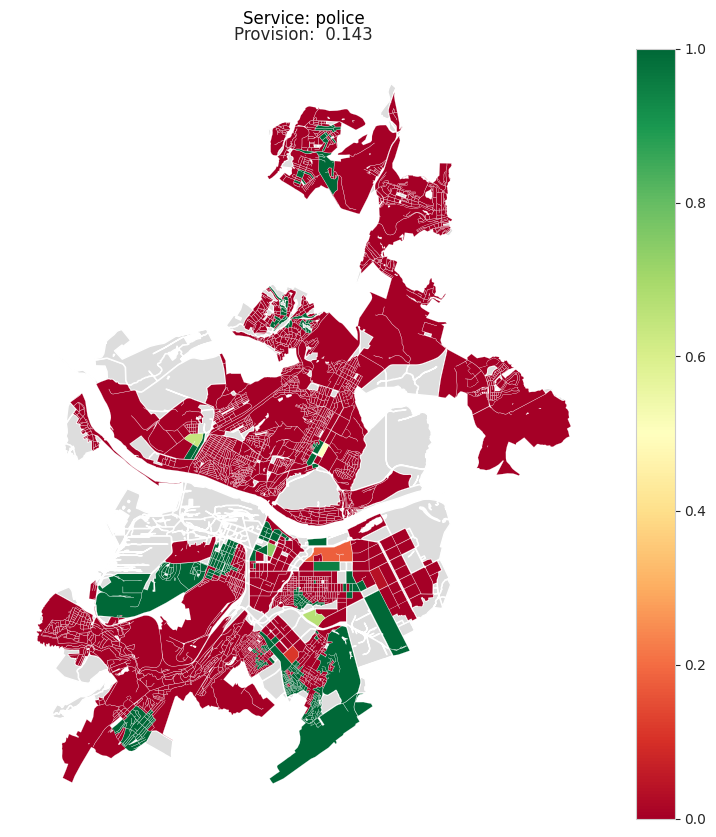

Гипотеза  2


2024-12-23 10:09:45.405 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 1994x64
2024-12-23 10:09:54.519 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 10:09:58.446 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 10:10:01.802 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


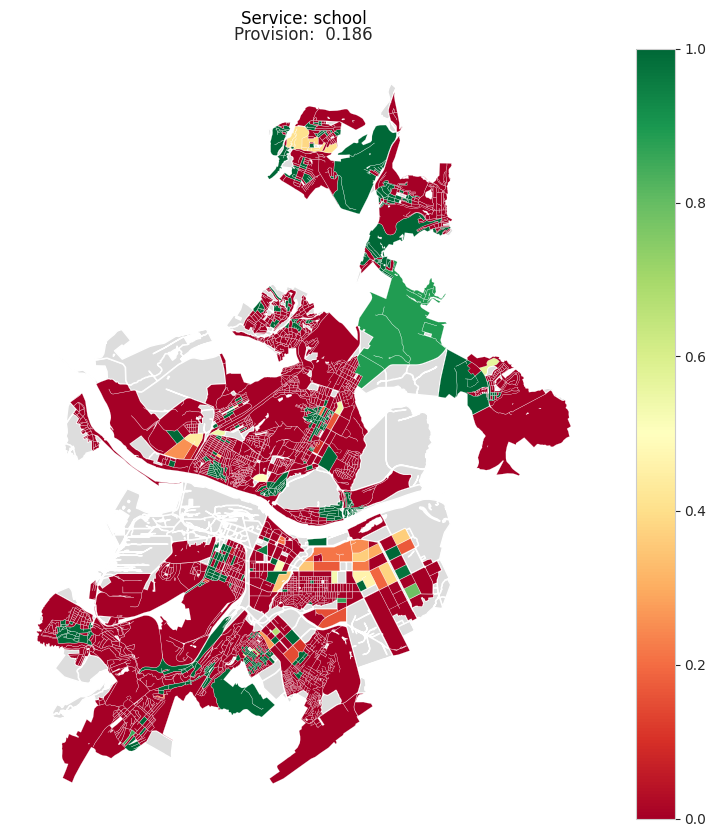

Гипотеза  3


2024-12-23 10:10:04.866 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 1994x13
2024-12-23 10:10:05.852 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 10:10:06.314 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 10:10:06.788 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


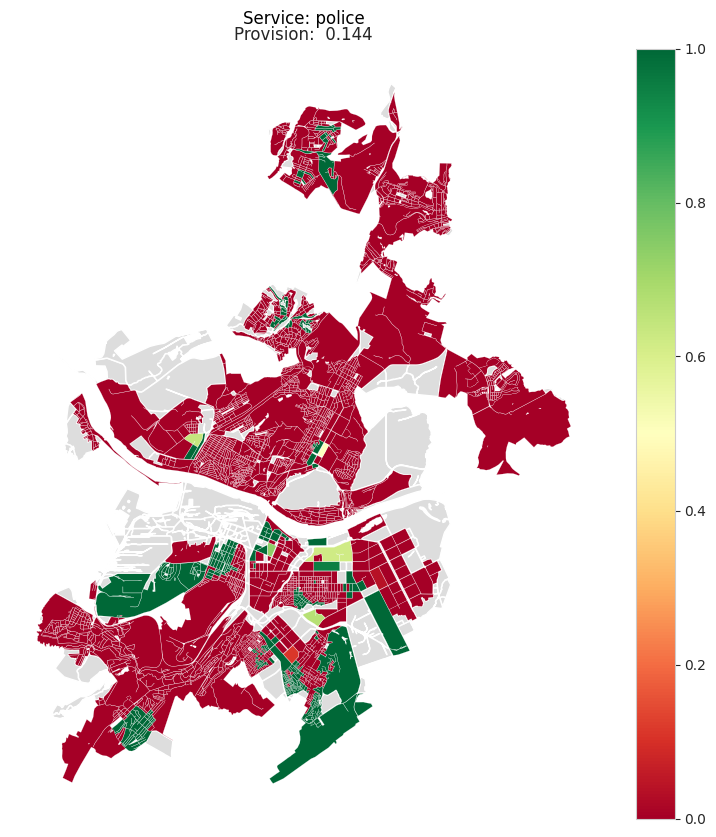

In [ ]:
a = 1
for Kemerovo, servicelist, population in zip(Kemerovo_list, servicelists.keys(), populations):
    # Формируем update_df для текущей гипотезы

    update = {
        2569: {
            'population': population
        }
    }
    update_df = pd.DataFrame.from_dict(update, 'index')
    print('Гипотеза ', a)

    a = a+1

    # Обрабатываем каждый сервис в текущей группе
    for service in set(servicelists[servicelist]):
        prov = Provision(city_model=Kemerovo)
        result = prov.calculate(service, update_df)

        prov.plot(result)

        plt.text(0.5, 1.05, f"Service: {service}", horizontalalignment='center',
                 verticalalignment='top', transform=plt.gca().transAxes, fontsize=12, color='black')

        plt.show()


Прогоняем обеспеченность по сервисам, которые добавились на территорию

2024-12-23 06:57:20.627 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 1994x64
2024-12-23 06:57:28.105 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 06:57:32.478 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 06:57:35.676 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


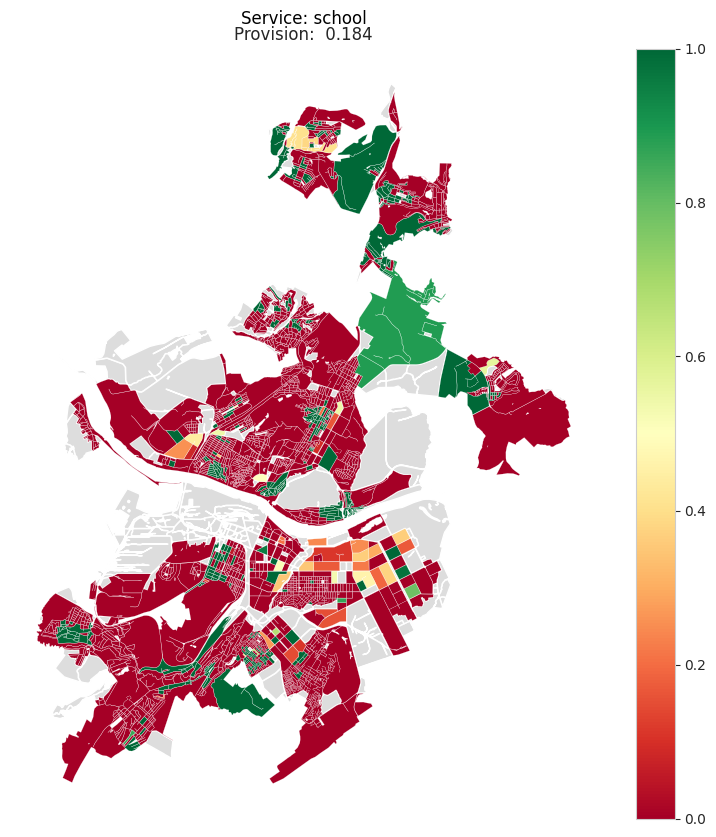

2024-12-23 06:57:37.869 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 7 : 1994x114
2024-12-23 06:57:44.055 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 06:57:47.081 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 06:57:49.652 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


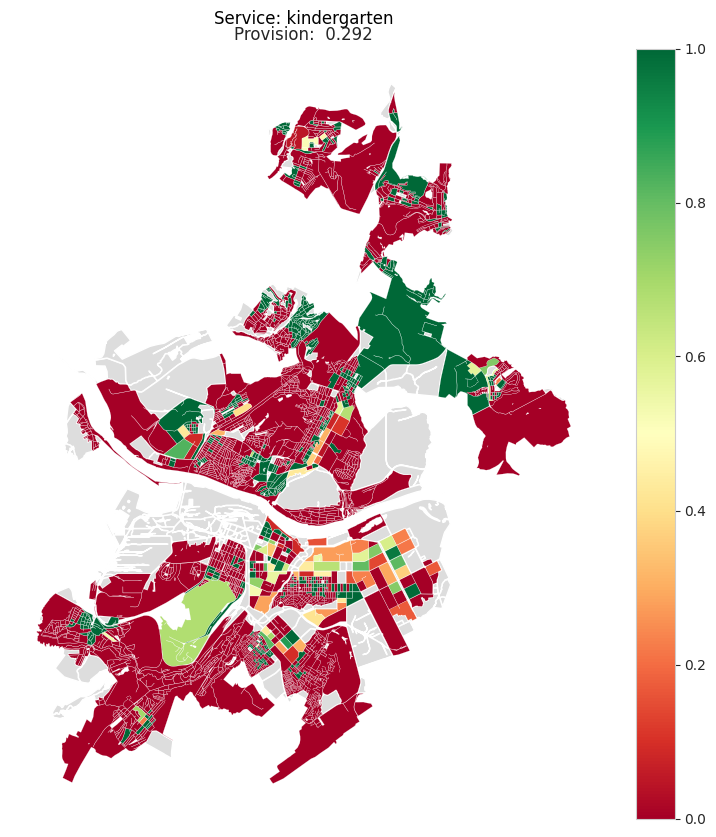

2024-12-23 06:57:52.264 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 1994x13
2024-12-23 06:57:53.215 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 06:57:53.657 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 06:57:54.122 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


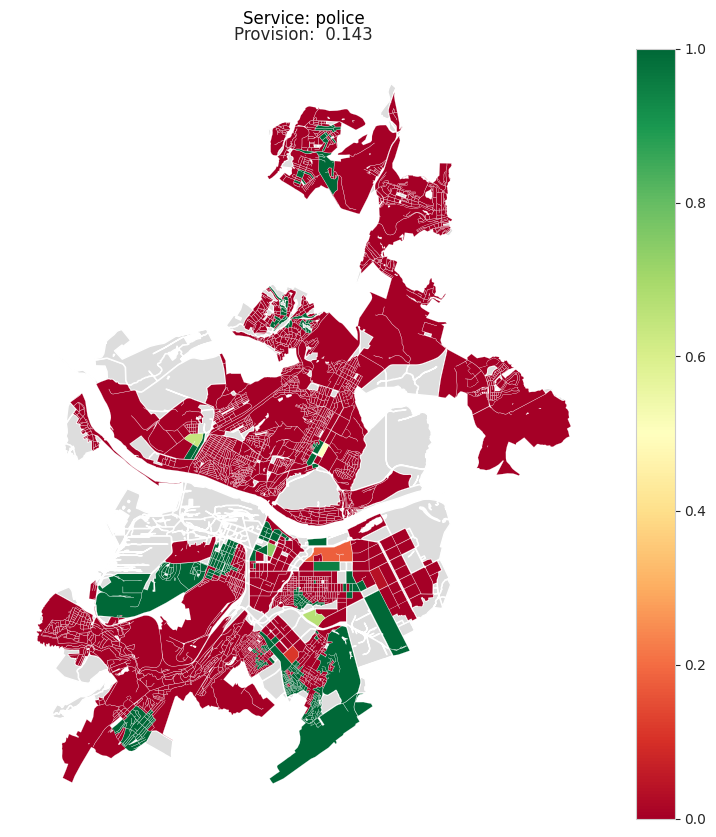

In [ ]:
for service in set(services1):
    prov = Provision(city_model=Kemerovo1)
    result = prov.calculate(service, update_df)

    prov.plot(result)

    plt.text(0.5, 1.05, f"Service: {service}", horizontalalignment='center',
             verticalalignment='top', transform=plt.gca().transAxes, fontsize=12, color='black')

    plt.show()